In [2]:
#For Avoding the warning
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
import seaborn as sns
#Using k fold cross validation
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np 
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn import svm

from sklearn.metrics import confusion_matrix, plot_confusion_matrix, roc_curve, precision_recall_curve, auc
from plotly.subplots import make_subplots
import itertools
# Run the following two lines of code for Uncaught Error: Script error for plotly
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [3]:
data=pd.read_csv("breast_cancer_wisconsin.csv")

In [4]:
print(data.shape)
data

(569, 32)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
#data.Class.unique()

In [7]:
# drop ID and Class columns
data = data.drop(['id'], axis=1)

In [4]:
# data = data.drop(['Unnamed: 32'], axis=1)

In [ ]:
# normalize the data to have a mean of 0 and std deviation of 1 (standard normal distribution)
# normalize by subtracting raw scores from mean and dividing by std deviation (z-score)
#data = (data - np.mean(data)) / np.std(data)
#data

In [ ]:
#data2.Class.unique()

In [9]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [13]:
names = data.columns[5:11]
# convert DataFrame to list
values=[] 
for column in data.iloc[:,5:11].columns:
    li = data[column].tolist()
    values.append(li)
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen','cyan', 'royalblue']

fig = go.Figure()
for xd, yd, cls in zip(names, values, colors):
        fig.add_trace(go.Box(
            y=yd,
            name=xd,
            boxpoints='outliers',
            jitter=0.5,
            whiskerwidth=0.2,
              fillcolor=cls,
            marker_size=3,
            line_width=2)
        )
fig.show()

In [15]:
fig = go.Figure(data=[go.Pie(labels=['2','4'], values=data['diagnosis'].value_counts(), textinfo='label+percent')])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=['gold', 'mediumturquoise'], line=dict(color='#000000', width=2)))
fig.show()

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['diagnosis'] = le.fit_transform(data['diagnosis']) # M:2, B:4
data['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

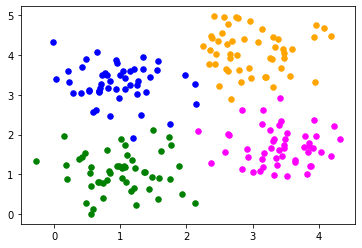

In [17]:
from sklearn.datasets import make_blobs

n_samples = 200
blob_centers = ([1, 1], [3, 4], [1, 3.3], [3.5, 1.8])
data, labels = make_blobs(n_samples=n_samples, 
                          centers=blob_centers, 
                          cluster_std=0.5,
                          random_state=0)


colours = ('green', 'orange', "blue", "magenta")
fig, ax = plt.subplots()

for n_class in range(len(blob_centers)):
    ax.scatter(data[labels==n_class][:, 0], 
               data[labels==n_class][:, 1], 
               c=colours[n_class], 
               s=30, 
               label=str(n_class))

In [2]:
# #Creating the variable  x and y
# x = data.drop("diagnosis", axis=1)
# y = data["diagnosis"]

In [3]:
#from sklearn.model_selection import train_test_split
# # Train-Test Split
#X_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [19]:
hidden_layer_sizes=[int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
activation=['identity', 'logistic', 'tanh', 'relu']
solver=['lbfgs', 'sgd', 'adam']
learning_rate=['constant', 'invscaling', 'adaptive']
random_grid={'hidden_layer_sizes':hidden_layer_sizes,'activation':activation,'solver':solver,'learning_rate':learning_rate}
print(random_grid)

{'hidden_layer_sizes': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000], 'activation': ['identity', 'logistic', 'tanh', 'relu'], 'solver': ['lbfgs', 'sgd', 'adam'], 'learning_rate': ['constant', 'invscaling', 'adaptive']}


In [21]:
from sklearn.model_selection import RandomizedSearchCV
RandomizedSearchCV(cv=5, estimator=MLPClassifier(), n_iter=2,
                    param_distributions={'activation': ['identity', 'logistic',
                                                        'tanh', 'relu'],
                                         'hidden_layer_sizes': [200, 400, 600,
                                                                800, 1000, 1200,
                                                                1400, 1600, 1800,
                                                                2000],
                                         'learning_rate': ['constant',
                                                          'invscaling',
                                                           'adaptive'],
                                         'solver': ['lbfgs', 'sgd', 'adam']},
                    random_state=75, verbose=2)

RandomizedSearchCV(cv=5, estimator=MLPClassifier(), n_iter=2,
                   param_distributions={'activation': ['identity', 'logistic',
                                                       'tanh', 'relu'],
                                        'hidden_layer_sizes': [200, 400, 600,
                                                               800, 1000, 1200,
                                                               1400, 1600, 1800,
                                                               2000],
                                        'learning_rate': ['constant',
                                                          'invscaling',
                                                          'adaptive'],
                                        'solver': ['lbfgs', 'sgd', 'adam']},
                   random_state=75, verbose=2)

In [23]:
# mlp_randomcv.best_params_

In [54]:
#Creating the variable  x and y
#x = data2.drop("Class", axis=1)
#y = data2["Class"]

In [86]:
#Train and Test split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [87]:
#printing the shape of x_train,x_test,y_train,y_test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(455, 30)
(455,)
(114, 30)
(114,)


In [88]:
#Split dataset into k consecutive folds (without shuffling by default)
#Creating the variable num_folds for how many no. of folds
num_folds = 5
#t maintains the same class ratio throughout the K folds as the ratio in the original dataset.
kfold=StratifiedKFold(n_splits = num_folds)

In [89]:
clf = MLPClassifier(hidden_layer_sizes=(100, 10,50))

In [90]:
for train_index, test_index in kfold.split(x,y):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  y_pred1 = clf.predict(X_train)

In [92]:
from sklearn import metrics
#comparing actual response values (y_train with predicted response values (y_pred1)
MLP_Train =  metrics.accuracy_score(y_train, y_pred1)*100
print("MLP model accuracy(in %) for Training:",MLP_Train)
#comparing actual response values (y_test) with predicted response values (y_pred)
MLP_Test = metrics.accuracy_score(y_test, y_pred)*100
print("MLP model accuracy(in %) for Testing:", MLP_Test)

MLP model accuracy(in %) for Training: 94.28571428571428
MLP model accuracy(in %) for Testing: 93.85964912280701


In [93]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score,roc_curve,roc_auc_score
##Confusion Matrix is the number of correct and incorrect predictions made by a classifier
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for Linear Discriminat Analysis :")
print(result)
#Getting the classification report
result1 = classification_report(y_test, y_pred)
print("Classification Report for Linear Discriminat Analysis :",)
print (result1)
#Overall accuracy
result2 = accuracy_score(y_test,y_pred)*100
print("Overall Accuracy For Linear Discriminat Analysis :",result2)

Confusion Matrix for Linear Discriminat Analysis :
[[66  1]
 [ 6 41]]
Classification Report for Linear Discriminat Analysis :
              precision    recall  f1-score   support

           0       0.92      0.99      0.95        67
           1       0.98      0.87      0.92        47

    accuracy                           0.94       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114

Overall Accuracy For Linear Discriminat Analysis : 93.85964912280701


In [94]:
FP = result.sum(axis=0) - np.diag(result) 
FN = result.sum(axis=1) - np.diag(result)
TP = np.diag(result)
TN = result.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
total=sum(sum(result))
# Sensitivity, hit rate, recall, or true positive rate
TPR = ((TP/(TP+FN))).mean()*100
# Specificity or true negative rate
TNR = ((TN/(TN+FP))).mean()*100 

print('Sensitivity:' ,TPR)
print('Specificity: ' ,TNR)

Sensitivity: 92.87075261987933
Specificity:  92.87075261987933


In [ ]:
#n_classes

In [95]:
probs = clf.predict_proba(X_test)
preds = probs[:,1]

In [96]:
print('Roc Score', roc_auc_score(y_test, preds, average='weighted'))

Roc Score 0.9765004763416959


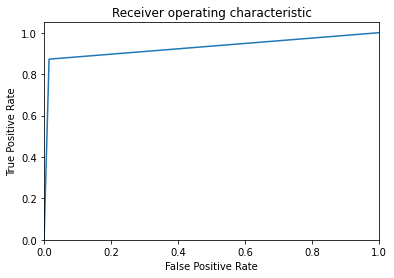

Roc 0.9287075261987933


In [97]:
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred)
    roc_auc[i] = auc(fpr[i], tpr[i])


#print roc_auc_score(y_test, y_pred)
plt.figure()
plt.plot(fpr[1], tpr[1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()
print('Roc',roc_auc_score(y_test, y_pred))

In [ ]:
# def metrics(X,CV_clf):
#     y_pred = CV_clf.predict(X)
#     cm = confusion_matrix(y_test, y_pred)
#     tn = cm[0,0]
#     fp = cm[0,1]
#     fn = cm[1,0]
#     tp = cm[1,1]
#     Accuracy=(tp+tn)/(tp+tn+fp+fn)
#     Sensitivity=tp/(tp+fn)
#     Specificity=tn/(tn+fp)
#     Precision=tp/(tp+fp)
#     F_measure=2*tp/(2*tp+fp+fn)
#     print('Accuracy=%.3f'%Accuracy)
#     print('Sensitivity=%.3f'%Sensitivity) # as the same as recall
#     print('Specificity=%.3f'%Specificity)
#     print('Precision=%.3f'%Precision)
#     print('F-measure=%.3f'%F_measure)
# plot_confusion_matrix(CV_clf, X_test, y_test)

In [ ]:
# def plot_roc_prc():
#     fpr, tpr, thresholds = roc_curve(y_test, y_score)
#     precision, recall, thresholds = precision_recall_curve(y_test, y_score)
#     plt = make_subplots(
#         rows=1, cols=2,
#         specs=[[{"type": "scatter"}, {"type": "scatter"}]],
#         subplot_titles=(f'ROC Curve (AUC={auc(fpr, tpr):.4f})',f'Precision-Recall Curve (AUC={auc(fpr, tpr):.4f})')
#     )
#     plt.add_trace(go.Scatter(x=fpr, y=tpr),row=1, col=1)
#     plt.add_shape(type='line', line=dict(dash='dash'),x0=0, x1=1, y0=0, y1=1,row=1, col=1)
#     plt.add_trace(go.Scatter(x=recall, y=precision),row=1, col=2)
#     plt.add_shape(type='line', line=dict(dash='dash'),x0=0, x1=1, y0=0.5, y1=0.5,row=1, col=2)
#     # Update axis properties
#     plt.update_xaxes(title_text="False Positive Rate / 1-Specificity", row=1, col=1)
#     plt.update_yaxes(title_text="True Positive Rate / Recall", row=1, col=1)
#     plt.update_xaxes(title_text="Recall", row=1, col=2)
#     plt.update_yaxes(title_text="Precision", row=1, col=2)
#     plt.show()